In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
import statistics
import seaborn as sn
import numpy as np

In [3]:
# reading the csv file
data = pd.read_csv('Data/station_data.csv')

# testing the read command
#print(data)

In [4]:
# inserting data to lists
dates = data['Data'].tolist()
time = data['Hora (UTC)'].tolist()
temp_inst = data['Temp. Ins. (C)'].tolist()
temp_max = data['Temp. Max. (C)'].tolist()
temp_min = data['Temp. Min. (C)'].fillna(0).tolist()
umidity_inst = data['Umi. Ins. (%)'].tolist()
umidity_max = data['Umi. Max. (%)'].tolist()
umidity_min = data['Umi. Min. (%)'].tolist()
dew_inst = data['Pto Orvalho Ins. (C)'].tolist()
dew_max = data['Pto Orvalho Max. (C)'].tolist()
dew_min = data['Pto Orvalho Min. (C)'].tolist()
pressure_inst = data['Pressao Ins. (hPa)'].tolist()
pressure_max = data['Pressao Max. (hPa)'].tolist()
pressure_min = data['Pressao Min. (hPa)'].tolist()
wind_speed = data['Vel. Vento (m/s)'].tolist()
wind_dir = data['Dir. Vento (m/s)'].tolist()
wind_gust = data['Raj. Vento (m/s)'].tolist()
radiation = data['Radiacao (KJ/m²)'].tolist()
precip = data['Chuva (mm)'].fillna(0).tolist()

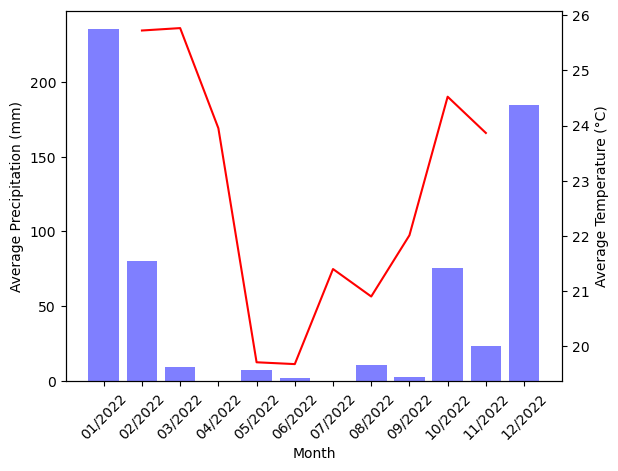


Total Annual Preciptation: 631.40 mm
Daily Average Precipitation: 1.73 mm
Monthly Average Precipitation: 52.62 mm
Monthly Standard Deviation: 79.36


In [22]:
# Monthly precipitation graph throughout the year
monthly_precip = {}
for i in range(len(dates)):
    date = datetime.strptime(dates[i], '%d/%m/%Y')
    month = date.strftime('%m/%Y')
    if month in monthly_precip:
        monthly_precip[month] += precip[i]
    else:
        monthly_precip[month] = precip[i]

for month, prec in monthly_precip.items():
    monthly_precip[month] = round(prec, 2)

# separating months and precipitation values
months = list(monthly_precip.keys())
precipi = list(monthly_precip.values())

# couting temperatures for each month
monthly_temp = {}
for i in range(len(dates)):
    date = datetime.strptime(dates[i], '%d/%m/%Y')
    month = date.strftime('%m/%Y')
    if month in monthly_temp:
        if not math.isnan(temp_inst[i]):
            monthly_temp[month]['total'] += temp_inst[i]
            monthly_temp[month]['count'] += 1
    else:
        monthly_temp[month] = {'total': temp_inst[i], 'count': 1}

# calculate average temperature for each month
for month, data in monthly_temp.items():
    avg_temp = data['total'] / data['count']
    monthly_temp[month]['avg_temp'] = avg_temp

# storing the temperatures in a list
monthly_avg_temp = []
for month, data in monthly_temp.items():
    monthly_avg_temp.append(data['avg_temp'])

# making a dual axis graph
fig, ax1 = plt.subplots()

# Plot average precipitation on left y-axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Precipitation (mm)')
ax1.bar(months, precipi, color='blue', alpha=0.5)
plt.xticks(rotation = 45)

# Create a twin axis for temperature on the right side
ax2 = ax1.twinx()

# Plot average temperature on right y-axis
ax2.set_ylabel('Average Temperature (°C)')
ax2.plot(months, monthly_avg_temp, color='red')
plt.show()

# Total annual preciptation
annual_precip = sum(precip)
print(f'\nTotal Annual Preciptation: {annual_precip:.2f} mm')

# Daily average of precipitation
daily_aver_precip = annual_precip / 365
print(f'Daily Average Precipitation: {daily_aver_precip:.2f} mm')

# Monthly mean
mean_mprec = statistics.mean(precipi)
print(f'Monthly Average Precipitation: {mean_mprec:.2f} mm')

# Monthly Standard Deviation
stdev_mpreci = statistics.stdev(precipi)
print(f'Monthly Standard Deviation: {stdev_mpreci:.2f}')

In [6]:
# cleanin the nan values from the lists
# this will be useful to draw trend lines within the scatter plots
temp_clean = [val for val in temp_inst if not np.isnan(val)]
umidity_clean = [val for val in umidity_inst if not np.isnan(val)]
dew__clean = [val for val in dew_inst if not np.isnan(val)]
radiation_clean = [val for val in radiation if not np.isnan(val)]
pressure_clean = [val for val in pressure_inst if not np.isnan(val)]

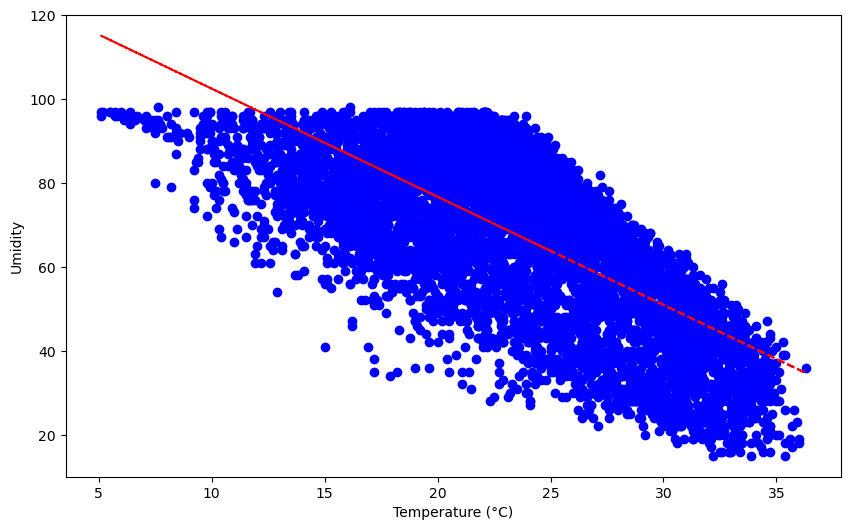

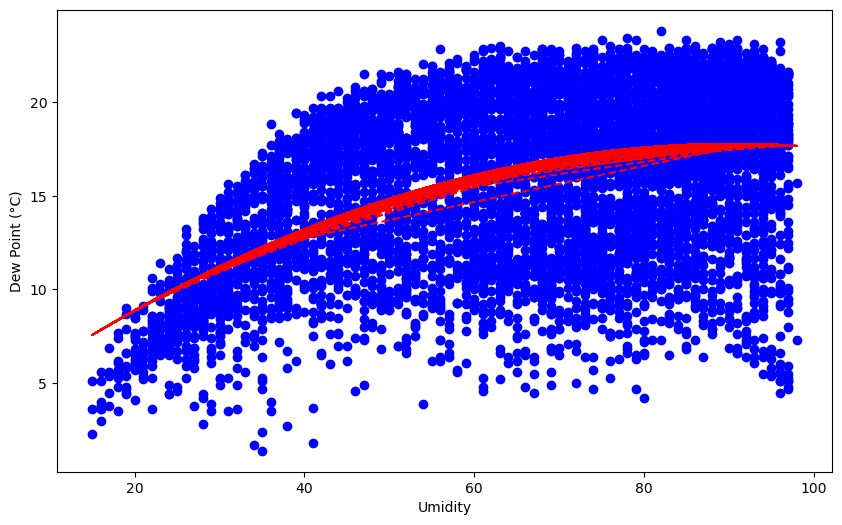

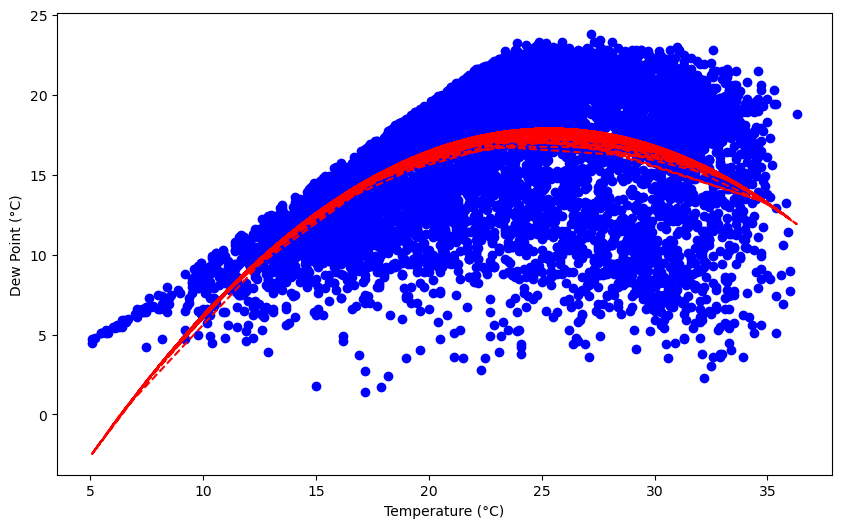

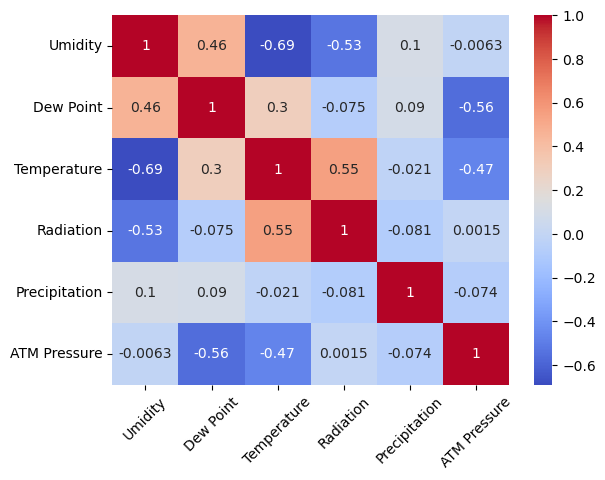

In [7]:
# Correlation between umidity, dew point, radiation, temperature and precipitation
df1 = pd.DataFrame({
    'Umidity' : umidity_inst,
    'Dew Point' : dew_inst,
    'Temperature' : temp_inst,
    'Radiation' : radiation,
    'Precipitation' : precip,
    'ATM Pressure' : pressure_inst
})

# scatter plots with trend lines
plt.figure(figsize = (10,6))
plt.scatter(temp_clean, umidity_clean, color = 'blue')
z = np.polyfit(temp_clean, umidity_clean, 1)
p = np.poly1d(z)
plt.plot(temp_clean, p(temp_clean), "r--")
plt.xlabel('Temperature (°C)')
plt.ylabel('Umidity')
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(umidity_clean, dew__clean, color = 'blue')
z = np.polyfit(umidity_clean, dew__clean, 2)
p = np.poly1d(z)
plt.plot(umidity_clean, p(umidity_clean), "r--")
plt.xlabel('Umidity')
plt.ylabel('Dew Point (°C)')
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(temp_clean, dew__clean, color = 'blue')
z = np.polyfit(temp_clean, dew__clean, 2)
p = np.poly1d(z)
plt.plot(temp_clean, p(temp_clean), "r--")
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point (°C)')
plt.show()

# correlation matrix with heatmap
corr1 = df1.corr()
sn.heatmap(corr1, annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()

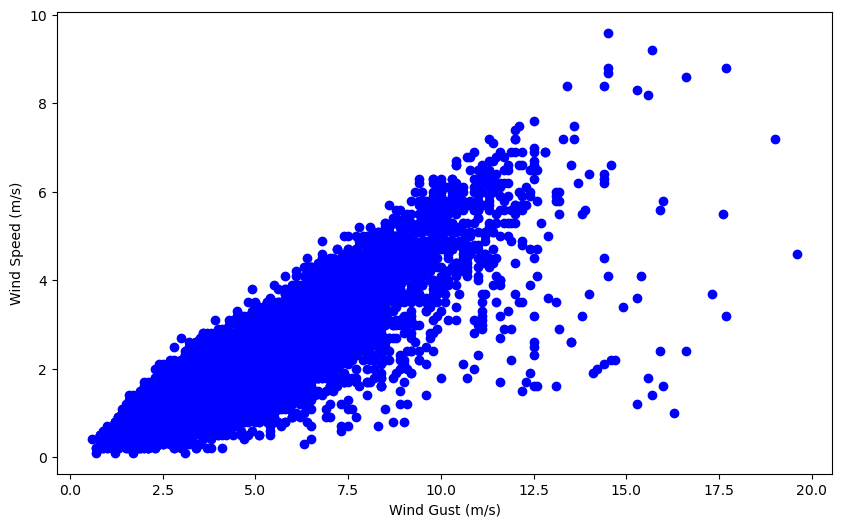

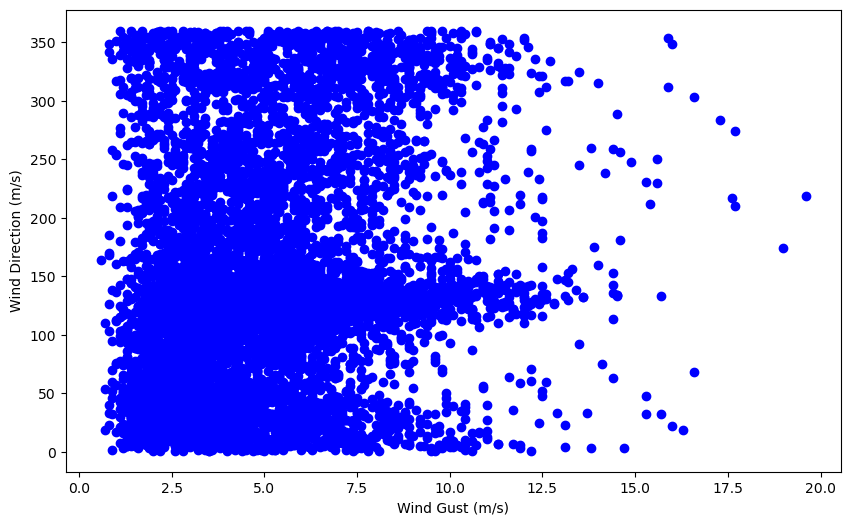

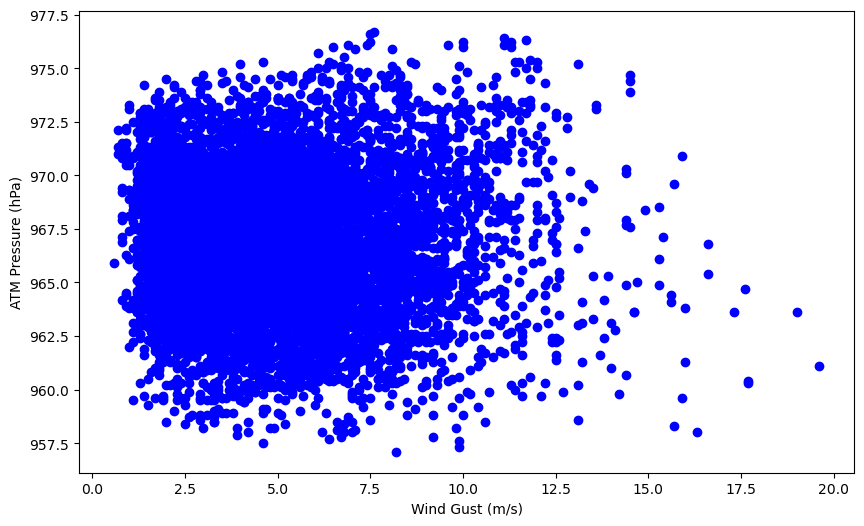

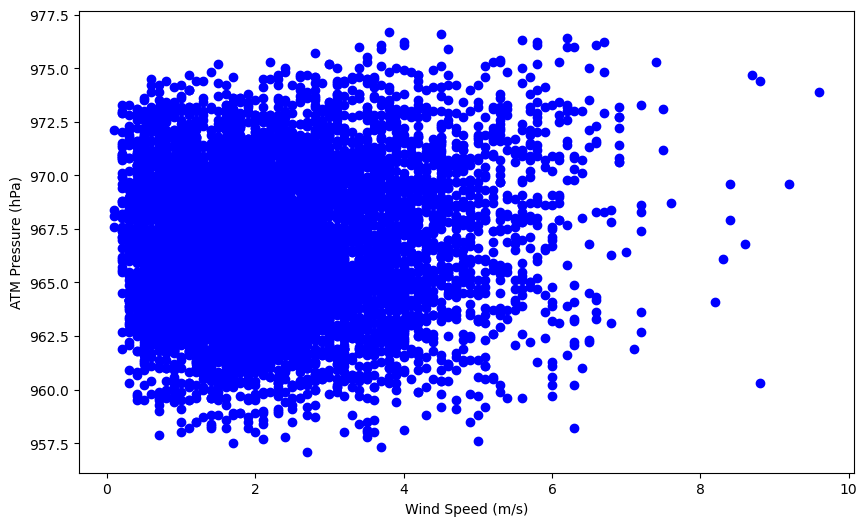

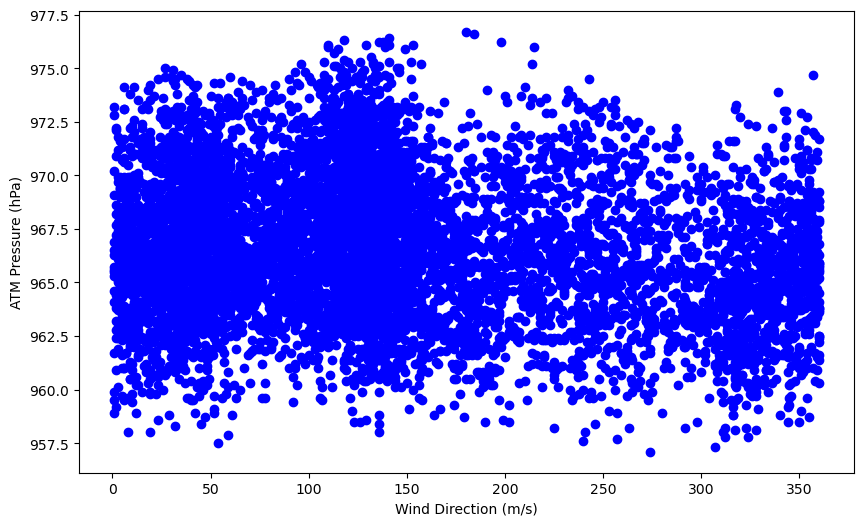

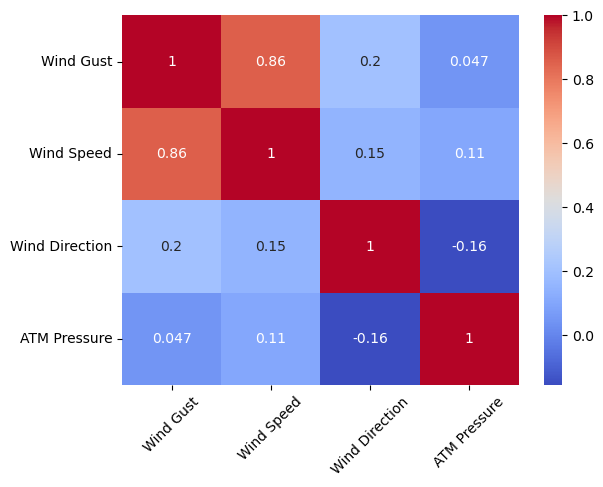

In [8]:
# dataframe with wind gust, wind speed, wind direction and atm pressure
df2 = pd.DataFrame({
    'Wind Gust' : wind_gust,
    'Wind Speed' : wind_speed,
    'Wind Direction' : wind_dir,
    'ATM Pressure' : pressure_inst
})

# graphs
plt.figure(figsize = (10,6))
plt.scatter(wind_gust, wind_speed, color = 'blue')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(wind_gust, wind_dir, color = 'blue')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('Wind Direction (m/s)')
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(wind_gust, pressure_inst, color = 'blue')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('ATM Pressure (hPa)')
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(wind_speed, pressure_inst, color = 'blue')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('ATM Pressure (hPa)')
plt.show()

plt.figure(figsize = (10,6))
plt.scatter(wind_dir, pressure_inst, color = 'blue')
plt.xlabel('Wind Direction (m/s)')
plt.ylabel('ATM Pressure (hPa)')
plt.show()

# Correlation Matrix with heatmap
corr2 = df2.corr()
sn.heatmap(corr2, annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()